# Feature Selection

In this notebook, we will find out which macro indicators have the highest predictive power when it comes to predicting future recessions. We will once again use sckikit learn to select best features. 

Let's first fetch our data and set X and y variables.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import getdata as gd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/fred_data.csv', index_col = 'Date', parse_dates = ['Date'])

independent_variables = df.columns[:-1]
X = df[independent_variables] 
y = df['Regime']

We are interested to find out which indicators pop as the best ones as time passes. We are going to group dates into 3 years. Then we select 10 best features.

There are many methods to use provided by sklearn to do feature selection, but for simplicity we are going to use the SelectKBest method. We adopt chi-square as a score to evaluate the predictive power against.

In [12]:
# Creating a list of tuples [(startyear, endyear), ....]

n = len(df)
start_index = np.arange(0,n,36) #3 years = 12 months * 3 = 36
end_index = start_index[1:]  
end_index = np.append(end_index, n)
start_end = tuple(zip(start_index, end_index))

# Put the result in a dataframe called 'res'
from sklearn.feature_selection import SelectKBest, chi2

res = pd.DataFrame()
for i,j in start_end:
    temp = df.iloc[i:j,:]
    date1 = temp.index.year[0]
    date2 = temp.index.year[-3]
    X_temp = temp.iloc[:,:-1]
    y_temp = temp['Regime']
    selector = SelectKBest(k=10).fit(X_temp, y_temp)
    features = pd.DataFrame(X_temp.columns[selector.get_support()]
                           .rename('{}-{}'.format(date1, date2))).T
    res = pd.concat([res,features])
    
res

,0,1,2,3,4,5,6,7,8,9
1960-1962,IPBUSEQ,PAYEMS,USGOOD,MANEMP,DMANEMP,INDPRO_lag_1M,IPBUSEQ_lag_1M,USGOOD_lag_1M,MANEMP_lag_1M,DMANEMP_lag_1M
1963-1965,PCEPI_lag_12M,DDURRG3M086SBEA_lag_12M,DNDGRG3M086SBEA_lag_12M,DSERRG3M086SBEA_lag_12M,CES0600000008_lag_12M,CES2000000008_lag_12M,CES3000000008_lag_12M,DTCOLNVHFNM_lag_12M,DTCTHFNM_lag_12M,INVEST_lag_12M
1966-1968,PCEPI_lag_12M,DDURRG3M086SBEA_lag_12M,DNDGRG3M086SBEA_lag_12M,DSERRG3M086SBEA_lag_12M,CES0600000008_lag_12M,CES2000000008_lag_12M,CES3000000008_lag_12M,DTCOLNVHFNM_lag_12M,DTCTHFNM_lag_12M,INVEST_lag_12M
1969-1971,PAYEMS,HOUSTMW_lag_1M,HOUST_lag_3M,HOUSTMW_lag_3M,REALLN_lag_3M,HOUST_lag_6M,PERMIT_lag_6M,PERMITNE_lag_6M,PERMITMW_lag_6M,M2SL_lag_6M
1972-1974,CPIULFSL_lag_1M,PERMITNE_lag_3M,PERMITMW_lag_3M,CUSR0000SAS_lag_3M,CPIULFSL_lag_3M,T1YFFM_lag_6M,T5YFFM_lag_6M,T10YFFM_lag_6M,AAAFFM_lag_6M,BAAFFM_lag_6M
1975-1977,IPMANSICS,USGOOD,MANEMP,NDMANEMP,IPFINAL_lag_1M,MANEMP_lag_1M,CUMFNS_lag_3M,T5YFFM_lag_3M,T10YFFM_lag_3M,TB3SMFFM_lag_6M
1978-1980,USGOOD,MANEMP,DMANEMP,NDMANEMP,PERMITS,HOUST_lag_1M,HOUSTS_lag_1M,PERMIT_lag_1M,PERMITS_lag_1M,CPIMEDSL_lag_3M
1981-1983,USGOOD,MANEMP,DMANEMP,PERMITW,HOUST_lag_1M,PERMIT_lag_1M,PERMITW_lag_1M,HOUST_lag_3M,HOUSTS_lag_3M,PERMIT_lag_3M
1984-1986,PCEPI_lag_12M,DDURRG3M086SBEA_lag_12M,DNDGRG3M086SBEA_lag_12M,DSERRG3M086SBEA_lag_12M,CES0600000008_lag_12M,CES2000000008_lag_12M,CES3000000008_lag_12M,DTCOLNVHFNM_lag_12M,DTCTHFNM_lag_12M,INVEST_lag_12M
1987-1989,PCEPI_lag_12M,DDURRG3M086SBEA_lag_12M,DNDGRG3M086SBEA_lag_12M,DSERRG3M086SBEA_lag_12M,CES0600000008_lag_12M,CES2000000008_lag_12M,CES3000000008_lag_12M,DTCOLNVHFNM_lag_12M,DTCTHFNM_lag_12M,INVEST_lag_12M


We can see that best indicators are time-varying or period-varying. In some periods, we see more lagged indicators and in some other periods the latest data controls prediction results. 

Let's plot recession dates from 1960 to investigate.

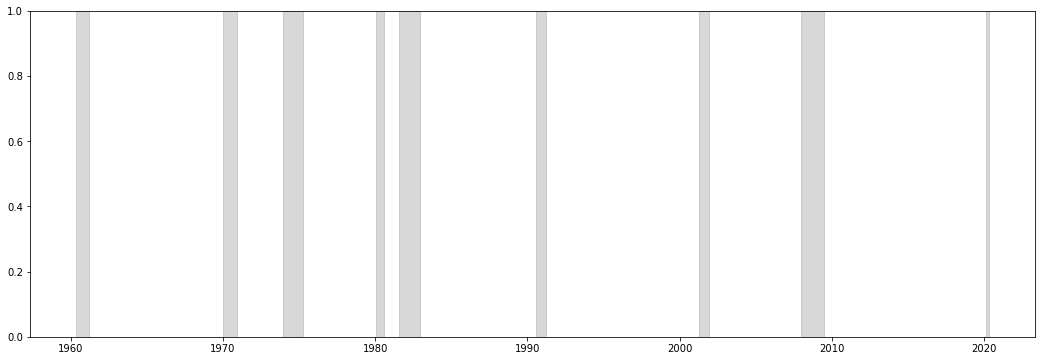

In [7]:
gd.plot_regime(pd.DataFrame(y))

We can see that, in general, preiods of recession had been led by current indicators (i.e. no lag) while periods of 'peace' had been foretold by lag indicators (i.e. data from 12 months ago tells the economic regime of today).

We see that during the GFC, 7 housing-related indicators made the top 10. Given these indicators are a 12M-lag, we can how short-sighted everybody had been. 

In the 2010s, the economy had been mainly fueled by consumer spending. 

Since 2020, we see that all top indicators are current indicators and that they are mainly commodity/energy and job markets related.

## Predict

Now let's assume that commodity/energy and job markets related indicators will still be the driving forces of our prediciton model in the next 1-12 months and predict the recession possibility.

We will extract past 3 years' data and use the lastest 3 months' data as the test set and the rest as the train set.

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [73]:
indicators = list(res.iloc[-1].values)
newdf = df[indicators].iloc[-36:]

newX = newdf 
newy = df['Regime'][-36:]

newmodels = [
    RandomForestClassifier(),    
    GradientBoostingClassifier(),            
    LogisticRegression(),                    
    DecisionTreeClassifier(),                
    SVC(probability=True)                                   
]

newX_train = newX.iloc[:-3]
newy_train = newy[:-3]
newX_test = newX.iloc[-3:]
newy_test = newy[-3:]

for newmodel in newmodels:
    newmodel.fit(newX_train, newy_train)
    newy_pred = newmodel.predict(newX_test)
    newy_pred_proba = newmodel.predict_proba(newX_test)
    print('Using {} --> '.format(newmodel))
    print('y_pred: ', newy_pred)
    print('y_pred_proba: ')    
    print(newy_pred_proba)
    print('-----------------------------------------------------')

Using RandomForestClassifier() --> 
y_pred:  [0. 0. 0.]
y_pred_proba: 
[[0.8  0.2 ]
 [1.   0.  ]
 [0.93 0.07]]
-----------------------------------------------------
Using GradientBoostingClassifier() --> 
y_pred:  [0. 0. 0.]
y_pred_proba: 
[[9.99307633e-01 6.92367396e-04]
 [9.99997257e-01 2.74277095e-06]
 [9.99966985e-01 3.30152033e-05]]
-----------------------------------------------------
Using LogisticRegression() --> 
y_pred:  [0. 0. 0.]
y_pred_proba: 
[[0.9889977  0.0110023 ]
 [0.98949619 0.01050381]
 [0.98951488 0.01048512]]
-----------------------------------------------------
Using DecisionTreeClassifier() --> 
y_pred:  [0. 0. 0.]
y_pred_proba: 
[[1. 0.]
 [1. 0.]
 [1. 0.]]
-----------------------------------------------------
Using SVC(probability=True) --> 
y_pred:  [0. 0. 0.]
y_pred_proba: 
[[0.93158511 0.06841489]
 [0.93540876 0.06459124]
 [0.93165103 0.06834897]]
-----------------------------------------------------


The model above is far from perfect - it only uses 3 years worth of monthly data and 10% of all available indicators so there are not enough datapoints - however, it can help you ideate further how to use sklearn to predict.

According to the model above, there won't be a recession in the next several months. Let's circle back in a few months and check whether it was a good idea to use those 10 indicators to predict where the economy is headed.